<a href="https://colab.research.google.com/github/ThainanST/lake-area-problem/blob/main/lake_area_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Lake Area Challenge




You will have an array (a list of lists) containing `0`s and `1`s. Each `0` represents land and each `1` represents water. A lake is made up of any number of vertically or horizontally adjacent (but not diagonally adjacent) `1`s. The number of adjacent `1`s determines the area of the lake.

Write a function that returns a list with the areas of the lakes contained in the matrix in ascending order.

An example is:

given the matrix

```
matrix = [
    [1, 1, 0, 1, 0],
    [1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1],
    [1, 0, 1, 0, 1],
    [1, 0, 1, 1, 0]
]
```
The expected response is a list of lake sizes:

```
sizes = [1, 2, 2, 3, 5]
```

# Solution

Two auxiliary matrices are fundamental in the algorithm:

- `map_draft`: copy the data, but the lakes are removed along the way
- `lake_draft`: auxiliary matrix for accounting for a lake.

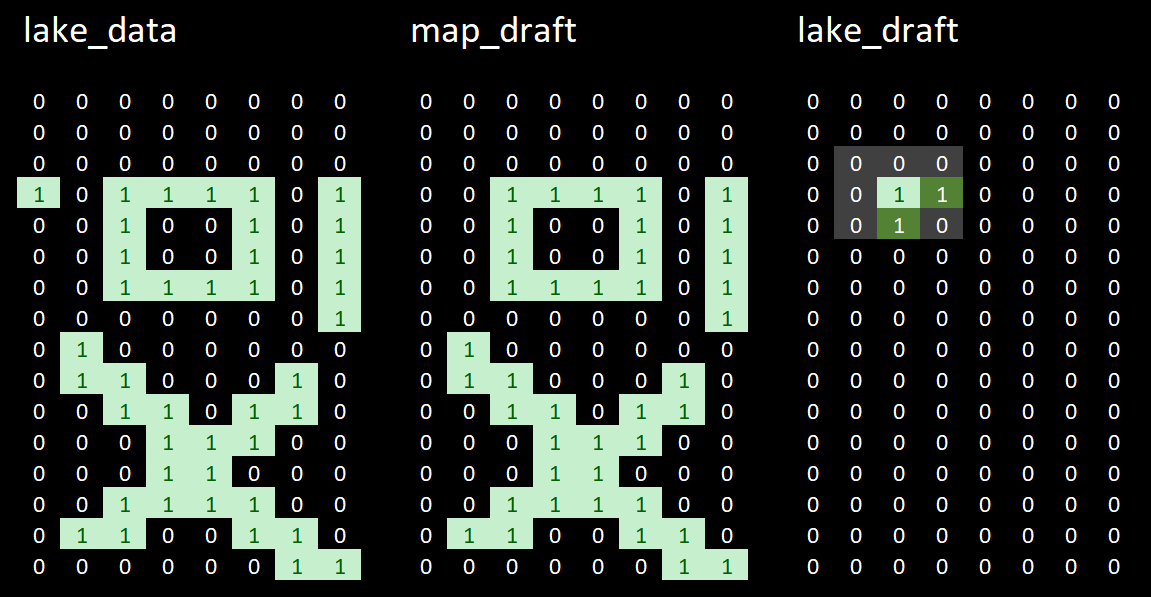

Algorithm description:

1. Main loop scans `map_draft` until it finds water;
2. The `lake_draft` array is reset'
3. When water is found, searches are carried out in the surroundings:
- If water is found, the lake grows (`lake_draft`);
- New searches and updates are made;
- When no new water is found, the lake area is counted;
- The accounted lake is removed from `map_draft`;
4. The process is repeated until no water is found in `map_draft`;
5. The process is finished.


In [1]:
%reset -f
from typing import List
import copy

class WaterAndLand:
    def start(self, lake_data: List[List[int]]):
        self.map_draft: List[List[int]]    = copy.deepcopy(lake_data)
        self.lake_draft: List[List[int]]   = copy.deepcopy(lake_data)
        self.num_rows: int                 = len(lake_data)
        self.num_columns: int              = len(lake_data[0])
        self.current_lake_information: List = []
        self.lake_areas_info: List[int]    = []
    
    def complete_reset_on_lake_draft(self):
        self.lake_draft = [[0 for col in range(self.num_columns) ] for row in range(self.num_rows) ]
    
    def reset_current_lake_information(self):
        self.current_lake_information = []
        
    def remove_lake_from_map_draft(self):
        for location in self.current_lake_information:
            row = location[0]
            col = location[1]
            self.map_draft[row][col] = 0
    
    def add_lake_information(self, row: int, column: int):
        pair = [row, column]
        if pair not in self.current_lake_information:
            self.current_lake_information.append(pair)
    
    def add_mark_on_lake_draft(self, row: int, column: int):
        self.lake_draft[row][column] = 1
        self.add_lake_information(row, column)
    
    def increment_lake_count(self, area: int):
        self.lake_areas_info.append(area)
    
    def get_lake_area(self) -> int:
        return sum( [ sum(self.lake_draft[row]) for row in range(self.num_rows)] )
    
    def search_above(self, row: int, column: int):
        row_above = row-1 if row-1 >0 else 0
        if self.map_draft[row_above][column] == 1:
            self.add_mark_on_lake_draft(row_above, column)
    
    def search_below(self, row: int, column: int):
        row_below = row+1 if (row+1 < self.num_rows-1) else self.num_rows-1
        if self.map_draft[row_below][column] == 1:
            self.add_mark_on_lake_draft(row_below, column)
    
    def search_left(self, row: int, column: int):
        column_left = column-1 if column-1 >0 else 0
        if self.map_draft[row][column_left] == 1:
            self.add_mark_on_lake_draft(row, column_left)
    
    def search_right(self, row: int, column: int):
        column_right = column+1 if column+1 < self.num_columns-1 else self.num_columns-1
        if self.map_draft[row][column_right] == 1:
            self.add_mark_on_lake_draft(row, column_right)  
    
    def search_around_draft(self, row: int, column: int):
        self.search_above(row, column)
        self.search_below(row, column)
        self.search_left(row, column)
        self.search_right(row, column)
    
    def search_lake_curves(self, init_row: int, init_column: int):
        self.reset_current_lake_information()
        self.complete_reset_on_lake_draft()
        self.add_mark_on_lake_draft(init_row, init_column)
        search_is_finished = False

        while search_is_finished == False:
            current_ordered_pair_info = copy.deepcopy(self.current_lake_information)
            for location in current_ordered_pair_info:
                self.search_around_draft(location[0], location[1])
            points_before_search = len(current_ordered_pair_info)
            points_after_search  = len(self.current_lake_information)
            if (points_before_search == points_after_search):
                search_is_finished = True
                
        lake_area = self.get_lake_area()
        self.increment_lake_count(lake_area)
        self.remove_lake_from_map_draft()
        self.reset_current_lake_information()
        self.complete_reset_on_lake_draft()
        
    def is_there_any_water_in_map_draft(self) -> bool:
        isThereWater = True in [True if 1 in self.map_draft[iRow] else False for iRow in range(self.num_rows)]
        return isThereWater
    
    def next_search_point(self) -> int:
        for iRow in range(self.num_rows):
            for iCol in range(self.num_columns):
                if self.map_draft[iRow][iCol] == 1:
                    return iRow, iCol
        
        
    def search_lakes_routine(self):
        while self.is_there_any_water_in_map_draft():
            iRow, iCol = self.next_search_point()
            self.search_lake_curves(iRow, iCol)
        
    
    def lake_areas(self, lake_data: List[List[int]]) -> List[int]:
        self.start(lake_data)
        self.search_lakes_routine()
        self.lake_areas_info.sort()
        return self.lake_areas_info

def lake_areas(m):
  return WaterAndLand().lake_areas(m)

In [2]:
matrix = [
    [1, 1, 0, 1, 0],
    [1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1],
    [1, 0, 1, 0, 1],
    [1, 0, 1, 1, 0]
]

lake_areas(matrix)

[1, 2, 2, 3, 5]

# Test Algorithm

In [ ]:
import unittest
import numpy as np

class TestResults(unittest.TestCase):
  def test_example(self):
    matrix = [
      [1, 1, 0, 1, 0],
      [1, 0, 1, 0, 0],
      [0, 0, 1, 0, 1],
      [1, 0, 1, 0, 1],
      [1, 0, 1, 1, 0]
    ]

    solution = [1, 2, 2, 3, 5]

    assert lake_areas(matrix) == solution


  def test_identity(self):
    matrix = np.identity(4, dtype=int).tolist()

    solution = [1, 1, 1, 1]

    assert lake_areas(matrix) == solution

  
  def test_none(self):
    matrix = np.zeros([6,6], dtype=int).tolist()
    solution = []

    assert lake_areas(matrix) == solution

  
  def test_full(self):
    matrix = np.ones([9,9], dtype=int).tolist()
    solution = [81]

    assert lake_areas(matrix) == solution


  def test_irregular_ones(self):
    matrix = np.ones([7, 3], dtype=int).tolist()
    solution = [21]

    assert lake_areas(matrix) == solution


  def test_irregular_zeros(self):
    matrix = np.zeros([17, 25], dtype=int).tolist()
    solution = []

    assert lake_areas(matrix) == solution

  
  def test_big_identity(self):
    matrix = np.identity(999, dtype=int).tolist()

    solution = np.ones(999, dtype=int).tolist()

    assert lake_areas(matrix) == solution


  def test_bigger_example(self):
    matrix = [
      [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
      [1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
      [1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
      [1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0],
      [1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
      [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0],
      [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
    ]

    solution = [1, 3, 5, 6, 21]

    assert lake_areas(matrix) == solution

unittest.main(argv=[''], verbosity=2, exit=False)

test_big_identity (__main__.TestResults) ... ok
test_bigger_example (__main__.TestResults) ... ok
test_example (__main__.TestResults) ... ok
test_full (__main__.TestResults) ... ok
test_identity (__main__.TestResults) ... ok
test_irregular_ones (__main__.TestResults) ... ok
test_irregular_zeros (__main__.TestResults) ... ok
test_none (__main__.TestResults) ... ok

----------------------------------------------------------------------
Ran 8 tests in 177.159s

OK
